<a href="https://colab.research.google.com/github/shengwenLeong/Colab/blob/main/GraphSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [4]:
class ConstructKnnGraph:
  def __init__(self, vertex_number, k_value):
    self.G = nx.DiGraph()
    self.vertex_number = vertex_number
    self.k_value = k_value
  
  def KnnGraph(self):
    data = np.random.rand(self.vertex_number,2)
    for i in range(data.shape[0]):
      self.G.add_node(i, pos=(data[i][0], data[i][1]))
      self.G.add_node(i, prop=1)
      self.G.add_node(i, accum=0)
    for i in range(data.shape[0]):
      query = data[i]
      dist = {}
      for t in range(data.shape[0]):
        if t==i:
          continue
        dist[t] = np.linalg.norm(data[t] - query)
        #print("query={}, nn={}, distance={}".format(i,t,dist))
      vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:self.k_value]
      for vertex in vertexSort:
        self.G.add_edge(i, vertex[0])
        #print("edge=({},{})".format(i, vertex[0]))
  def DrawGraph(self):
    node_pos = nx.get_node_attributes(self.G, 'pos')
    nx.draw_networkx(self.G, node_pos)
    # Show the plot
    plt.show()

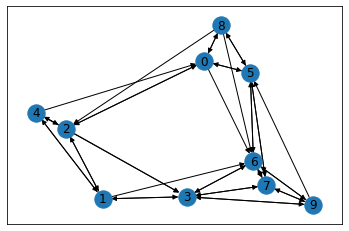

In [5]:
KGraph = ConstructKnnGraph(10, 4)
KGraph.KnnGraph()
KGraph.DrawGraph()

In [40]:
import sys
MAX_PROP = sys.maxsize - 1
class GraphFramework:
  def __init__(self, inputGraph):
    self.G = inputGraph
    self.edges = self.G.edges()
    self.update = []
    self.vertex = self.G.nodes()
    self.BIT_MASK = 0x80000000
  
  def initProperty(self, srcProp):
    return srcProp + 1 #the level of bfs

  def reset_nodes_attribute(self):
    for i in self.vertex:
      self.G.add_node(i, accum=MAX_PROP)

  def Scatter(self, weight=None, srcProp=None):
    return srcProp

  def Gather(self, ori, dst_value):
    if ((((ori & ~self.BIT_MASK) > (dst_value & ~self.BIT_MASK)) and (dst_value != 0)) or (ori == 0x0)):
      return dst_value
    else:
      return ori
    #return ((((ori & ~self.BIT_MASK) > (dst_value & ~self.BIT_MASK)) && (dst_value != 0)) || (ori == 0x0)) ? (dst_value) : (ori)

  def Apply(self, accum, value):
    update = 0
    uProp = accum
    wProp = 0
    if (((value & self.BIT_MASK) == self.BIT_MASK) and (uProp == MAX_PROP)):
      print("enter this stage")
      iter = 1
      wProp = value
    else:
      iter = 0
      wProp = uProp & 0x7FFFFFFF
    update = wProp
    return iter, update


  def run(self):
    iter = 1
    count = 0
    while iter and count < 10:
      for src, dst in self.edges:
        print("edge=({},{})".format(src,dst))
        srcProp  = self.G.nodes[src]['prop']
        srcProp  = self.initProperty(srcProp)
        dst_value = self.Scatter(srcProp=srcProp)
        self.update.append((src, dst, dst_value))

      for src, dst, dst_value in self.update:
        print("update=({},{})".format(src, dst))
        ori = self.G.nodes[dst]['accum']
        print("input value=({},{})".format(ori, dst_value))
        accum = self.Gather(ori, dst_value)
        print("dst={}, accum=({})".format(dst, accum))
        self.G.add_node(dst, accum=accum)
      iter = 0
      for v in self.vertex:
        accum = self.G.nodes[v]['accum']
        value = self.G.nodes[v]['prop']
        print("vertex={}, apply_input=({},{})".format(v,accum,value))
        iter_, result = self.Apply(accum, value)
        print("vertex={},iter_={},apply={}".format(v,iter_,result))
        self.G.nodes[v]['prop'] = result
        iter = iter + iter_
      self.update.clear()
      print(list(self.G.nodes(data=True)))
      count = count + 1

In [43]:
G = nx.DiGraph()
for i in range(7):
  G.add_node(i, prop=MAX_PROP)
  G.add_node(i, accum=MAX_PROP)

G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,5)
G.add_edge(2,6)

root = 0
edges = list(nx.bfs_edges(G, root))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

G.add_node(0, prop=0x80000001)
G.add_node(0, accum=0x80000001)
graphprocess = GraphFramework(G)
graphprocess.run()

for i, value in nx.get_node_attributes(G, 'prop').items():
  print("i={}, level={}".format(i, value))

7
[0, 1, 2, 3, 4, 5, 6]
edge=(0,1)
edge=(0,2)
edge=(1,3)
edge=(1,4)
edge=(2,5)
edge=(2,6)
update=(0,1)
input value=(9223372036854775806,2147483650)
dst=1, accum=(2147483650)
update=(0,2)
input value=(9223372036854775806,2147483650)
dst=2, accum=(2147483650)
update=(1,3)
input value=(9223372036854775806,9223372036854775807)
dst=3, accum=(9223372036854775806)
update=(1,4)
input value=(9223372036854775806,9223372036854775807)
dst=4, accum=(9223372036854775806)
update=(2,5)
input value=(9223372036854775806,9223372036854775807)
dst=5, accum=(9223372036854775806)
update=(2,6)
input value=(9223372036854775806,9223372036854775807)
dst=6, accum=(9223372036854775806)
vertex=0, apply_input=(2147483649,2147483649)
vertex=0,iter_=0,apply=1
vertex=1, apply_input=(2147483650,9223372036854775806)
vertex=1,iter_=0,apply=2
vertex=2, apply_input=(2147483650,9223372036854775806)
vertex=2,iter_=0,apply=2
vertex=3, apply_input=(9223372036854775806,9223372036854775806)
enter this stage
vertex=3,iter_=1,apply

In [41]:
G = nx.DiGraph()
for i in range(4):
  G.add_node(i, prop=MAX_PROP)
  G.add_node(i, accum=MAX_PROP)

G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(2,3)
G.add_edge(3,3)

root = 2
edges = list(nx.bfs_edges(G, root))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

G.add_node(2, prop=0x80000001)
G.add_node(2, accum=0x80000001)
print("init_value={}".format(0x80000001))
graphprocess = GraphFramework(G)
graphprocess.run()

for i, value in nx.get_node_attributes(G, 'prop').items():
  print("i={}, level={}".format(i, value))

4
[2, 0, 3, 1]
init_value=2147483649
edge=(0,1)
edge=(0,2)
edge=(1,2)
edge=(2,0)
edge=(2,3)
edge=(3,3)
update=(0,1)
input value=(9223372036854775806,9223372036854775807)
dst=1, accum=(9223372036854775806)
update=(0,2)
input value=(2147483649,9223372036854775807)
dst=2, accum=(2147483649)
update=(1,2)
input value=(2147483649,9223372036854775807)
dst=2, accum=(2147483649)
update=(2,0)
input value=(9223372036854775806,2147483650)
dst=0, accum=(2147483650)
update=(2,3)
input value=(9223372036854775806,2147483650)
dst=3, accum=(2147483650)
update=(3,3)
input value=(2147483650,9223372036854775807)
dst=3, accum=(2147483650)
vertex=0, apply_input=(2147483650,9223372036854775806)
vertex=0,iter_=0,apply=2
vertex=1, apply_input=(9223372036854775806,9223372036854775806)
enter this stage
vertex=1,iter_=1,apply=9223372036854775806
vertex=2, apply_input=(2147483649,2147483649)
vertex=2,iter_=0,apply=1
vertex=3, apply_input=(2147483650,9223372036854775806)
vertex=3,iter_=0,apply=2
[(0, {'prop': 2, 'ac

In [92]:
root = 0
edges = list(nx.bfs_edges(KGraph.G, 0))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

10
[0, 4, 2, 6, 9, 1, 8, 5, 7, 3]


In [ ]:
G = nx.DiGraph()
data = np.random.rand(10,2)
dataSet = {}
for i in range(data.shape[0]):
  dataSet[i] = data[i]
  G.add_node(i, pos=(data[i][0], data[i][1]))
  print(data[i])

[0.8135964  0.91249162]
[0.05686753 0.32124302]
[0.98859806 0.39388879]
[0.83505196 0.84756349]
[0.69730069 0.52685776]
[0.03301789 0.33515292]
[0.25169853 0.33479391]
[0.71457457 0.45766219]
[0.75080974 0.54800307]
[0.38596624 0.46812933]


In [ ]:
graph_k = 4
for i in range(data.shape[0]):
  query = data[i]
  dist = {}
  for t in range(data.shape[0]):
    if t==i:
      continue
    dist[t] = np.linalg.norm(data[t] - query)
    #print("query={}, nn={}, distance={}".format(i,t,dist))
  vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:4]
  for vertex in vertexSort:
    G.add_edge(i, vertex[0])
    print("edge=({},{})".format(i, vertex[0]))

edge=(0,3)
edge=(0,8)
edge=(0,4)
edge=(0,7)
edge=(1,5)
edge=(1,6)
edge=(1,9)
edge=(1,7)
edge=(2,7)
edge=(2,8)
edge=(2,4)
edge=(2,3)
edge=(3,0)
edge=(3,8)
edge=(3,4)
edge=(3,7)
edge=(4,8)
edge=(4,7)
edge=(4,9)
edge=(4,2)
edge=(5,1)
edge=(5,6)
edge=(5,9)
edge=(5,4)
edge=(6,9)
edge=(6,1)
edge=(6,5)
edge=(6,7)
edge=(7,4)
edge=(7,8)
edge=(7,2)
edge=(7,9)
edge=(8,4)
edge=(8,7)
edge=(8,2)
edge=(8,3)
edge=(9,6)
edge=(9,4)
edge=(9,7)
edge=(9,1)


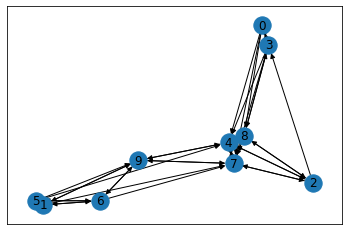

In [ ]:
node_pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, node_pos)
# Show the plot
plt.show()

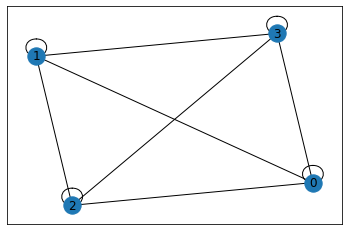

In [26]:
G = nx.Graph()
for i in range(4):
  G.add_node(i, prop=1)
  G.add_node(i, accum=0)
for i in range(4):
  for j in range(4):
    G.add_edge(i,j)
'''
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(2,3)
G.add_edge(3,3)
'''
nx.draw_networkx(G)

In [11]:
edges = G.edges()
for src, dst in G.edges():
  print(src)
  print(dst)

0
1
0
2
1
2
2
3
3
3


In [5]:
root = 2
edges = list(nx.bfs_edges(G, root))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

4
[2, 0, 1, 3]
